# Heart Desease Prediction

Execise: Predict if a patient has a heart disease or not. We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

Dataset = https://archive.ics.uci.edu/ml/datasets/Heart+Disease

-----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from math import pi

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load and prepare data

In [3]:
import os
os.path.abspath(os.getcwd())

'/Users/jeydi/OneDrive/CorsoInsubria-DataScienceBusiness/Notebooks/6_machine_learning/deep_learning'

In [4]:
data_path='./data/heart.csv'

df = pd.read_csv(data_path)

print(f"Dataframe shape: {df.shape}")
df.head(10)

Dataframe shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Understand the data

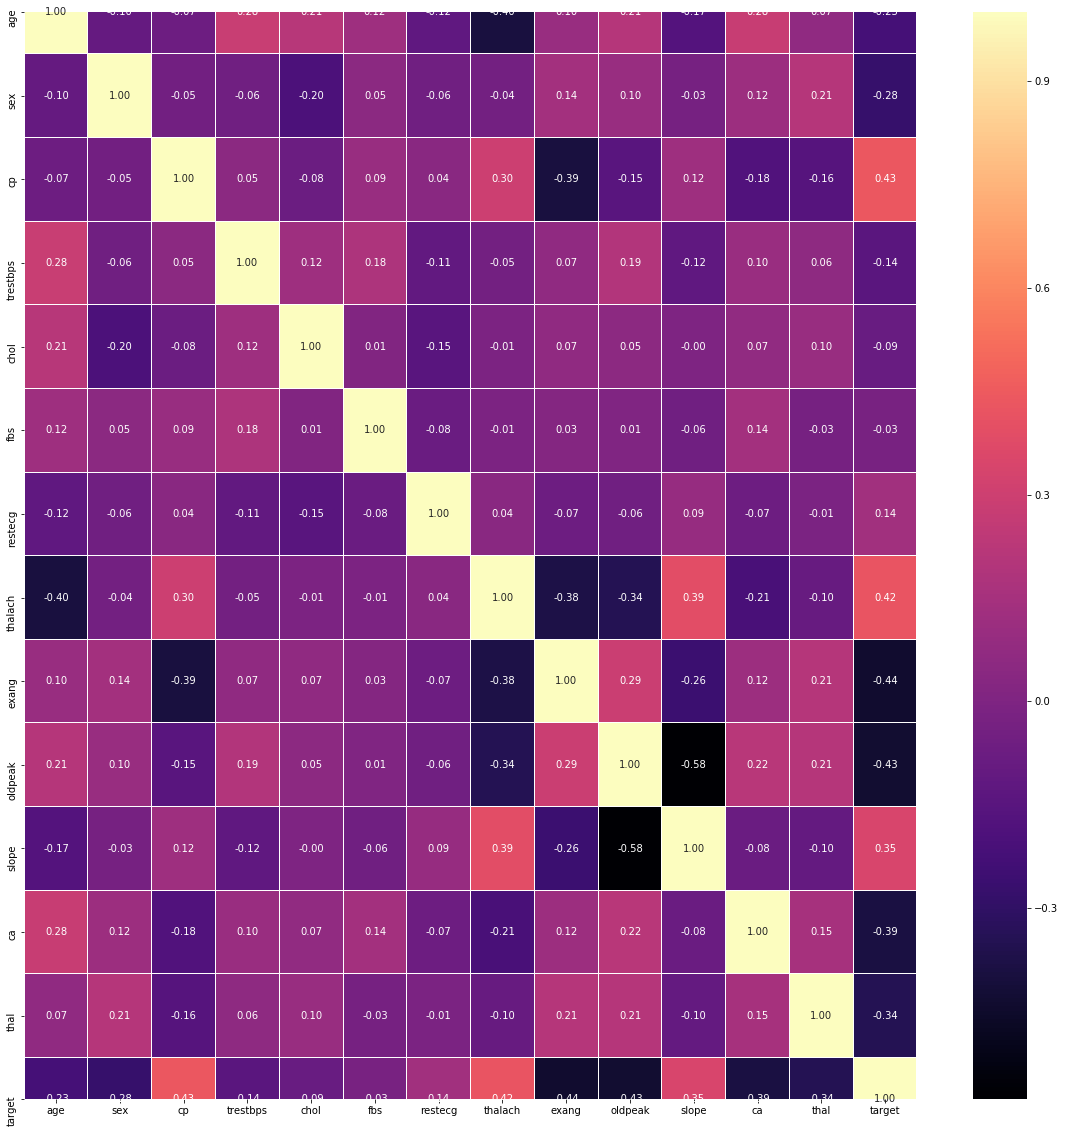

In [5]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

People having heart diseace vs people who doesn't: 
 1    165
0    138
Name: target, dtype: int64


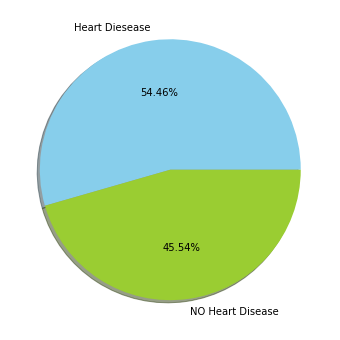

In [6]:
print("People having heart diseace vs people who doesn't: \n", df.target.value_counts())
heart_disease = len(df[df['target']==1])
no_heart_disease = len(df[df['target']==0])
labels = ["Heart Diesease", "NO Heart Disease"]
sizes = [heart_disease, no_heart_disease]
colors = ['skyblue', 'yellowgreen']
plt.figure(figsize=(8,6))

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True)
plt.show()

## Feature Engineering

Dummy variables (cp, thal, slope)

In [10]:
cp = pd.get_dummies(df['cp'], prefix = "cp")
thal = pd.get_dummies(df['thal'], prefix = "thal")
slope = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, cp, thal, slope]

df = pd.concat(frames, axis = 1)
to_drop = ['cp','thal','slope']
df = df.drop(to_drop, axis=1)

df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
df = (df - np.min(df)) / (np.max(df) - np.min(df)).values

Get features and target

In [12]:
features = df.drop('target',axis =1)
targets = df.target.values

Split the dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state=42)

Visualize shape of the dataset and info

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 21)
(61, 21)
(242,)
(61,)


## Build models

### First easy model

In [18]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

Build the model (4 layers)

In [31]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae','mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________


Tensorboard configuration

In [32]:
from datetime import datetime
logdir = 'logs/scalars/' + datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

Train the model

In [34]:
epochs_number = 100
history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs_number, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0299 - mae: 0.0675 - mse: 0.0299 - val_loss: 0.1299 - val_mae: 0.1815 - val_mse: 0.1299
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0265 - mae: 0.0622 - mse: 0.0265 - val_loss: 0.1314 - val_mae: 0.1800 - val_mse: 0.1314
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0270 - mae: 0.0613 - mse: 0.0270 - val_loss: 0.1298 - val_mae: 0.1791 - val_mse: 0.1298
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0253 - mae: 0.0605 - mse: 0.0253 - val_loss: 0.1347 - val_mae: 0.1845 - val_mse: 0.1347
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0243 - mae: 0.0587 - mse: 0.0243 - val_loss: 0.1304 - val_mae: 0.1808 - val_mse: 0.1304
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0229 - mae: 0.0563 - mse: 0.0229 - val_loss: 0.1372 - val_mae: 0.1850 - val_mse: 0.1372
Epoch 7/100
13/13 [===

13/13 [==============================] - 0s 4ms/step - loss: 0.0213 - mae: 0.0304 - mse: 0.0213 - val_loss: 0.1447 - val_mae: 0.1718 - val_mse: 0.1447
Epoch 52/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0213 - mae: 0.0303 - mse: 0.0213 - val_loss: 0.1453 - val_mae: 0.1722 - val_mse: 0.1453
Epoch 53/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0212 - mae: 0.0302 - mse: 0.0212 - val_loss: 0.1457 - val_mae: 0.1724 - val_mse: 0.1457
Epoch 54/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0212 - mae: 0.0301 - mse: 0.0212 - val_loss: 0.1461 - val_mae: 0.1723 - val_mse: 0.1461
Epoch 55/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0211 - mae: 0.0298 - mse: 0.0211 - val_loss: 0.1467 - val_mae: 0.1727 - val_mse: 0.1467
Epoch 56/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0211 - mae: 0.0300 - mse: 0.0211 - val_loss: 0.1471 - val_mae: 0.1725 - val_mse: 0.1471
Epoch 57/100
13/13 [=========

## Evaluate the model and results

evaluate model loss with epochs on train and test

Prediction vs original labels

### More complicated model

Recreate the input using 2 dim on output

In [93]:
print(y_train.shape)
print(x_train.shape)

(60000,)
(60000, 28, 28)


Define the new model and compile

Fit the model

In [2]:
# fit the model to the training data
n_epochs = 200
n_batch = 10

Print model accuracy vs val accuracy

Print model loss vs val loss

# MNIST Example

https://keras.io/api/datasets/mnist/

Import the dataset

Create the model

Create a second more complicated model

In this case we use dropout to avoid overfitting: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

Tensorboard configuration

Train the model (and compile)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2818 - accuracy: 0.9178 - categorical_accuracy: 0.1002 - val_loss: 0.1734 - val_accuracy: 0.9466 - val_categorical_accuracy: 0.1009
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1250 - accuracy: 0.9613 - categorical_accuracy: 0.0992 - val_loss: 0.1055 - val_accuracy: 0.9652 - val_categorical_accuracy: 0.1001
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0922 - accuracy: 0.9710 - categorical_accuracy: 0.0991 - val_loss: 0.1061 - val_accuracy: 0.9683 - val_categorical_accuracy: 0.0994
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0717 - accuracy: 0.9779 - categorical_accuracy: 0.0990 - val_loss: 0.0915 - val_accuracy: 0.9720 - val_categorical_accuracy: 0.0973
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9816 - categorical_accuracy: 0.0987 - val_loss: 0.0809 - val_accurac

Compare the results (val loss)